In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['Sex'].replace({
    'M': 'Male',
    'F': 'Female'
}, inplace=True)
df['Na_to_K'] = df['Na_to_K'].round(0).astype(int)

In [14]:
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age': top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot_encoder_sex = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
X = pd.concat([X, onehot_df], axis=1)
X = X.drop('Sex', axis=1)

labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_chollesterol = LabelEncoder()

X['Cholesterol'] = labelled_encoder_chollesterol.fit_transform(X['Cholesterol'])
X['BP'] = labelled_encoder_blood_pressure.fit_transform(X['BP'])

X

,Age,BP,Cholesterol,Na_to_K,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train.index

Index([  2,  77,  46, 187, 191,  85, 161,  36, 190,  61,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=120)

In [18]:
X_test.index

Index([ 95,  15,  30, 158, 128, 115,  69, 170, 174,  45,  66, 182, 165,  78,
       186, 177,  56, 152,  82,  68, 124,  16, 148,  93,  65,  60,  84,  67,
       125, 132,   9,  18,  55,  75, 150, 104, 135, 137, 164,  76,  79, 197,
        38,  24, 122, 195,  29,  19, 143,  86, 114, 173,   5, 126, 117,  73,
       140,  98, 172,  96, 169,  97,  31,  12,  35, 119,  42, 189,  90, 136,
        51, 127, 162,  41, 118, 113,  26, 139, 100, 111],
      dtype='int64')

In [19]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [21]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

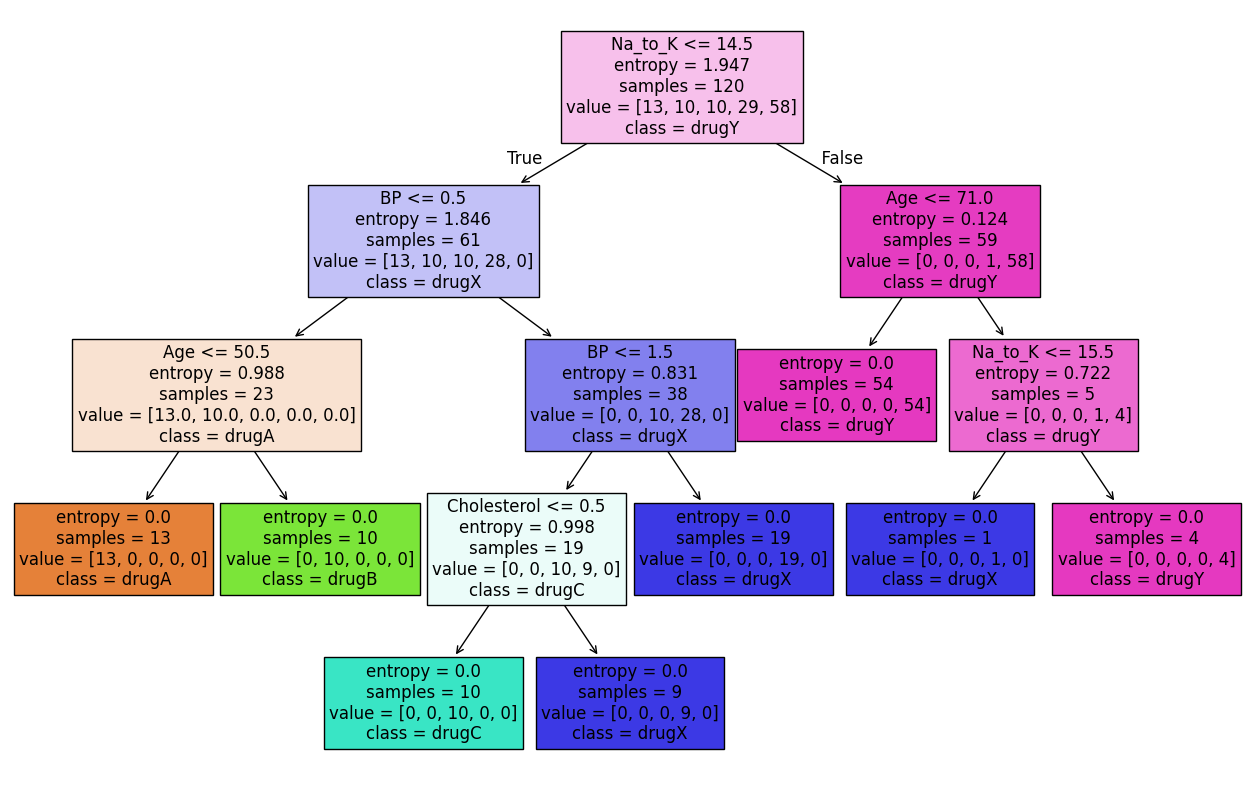

In [24]:
columns = X_train.columns

plt.figure(figsize=(16,10))
plot_tree(dtc, class_names=dtc.classes_, feature_names=columns, fontsize=12, filled=True)
plt.show()

In [29]:
# WE và IG khi tách root thành left và right
we_left = 1.846 * (61 / 120)
we_right = 0.124 * (59 / 120)
print(f'weighted entropy: {we_left + we_right}')
print(f'Information gain: {1.947 - (we_left + we_right)}')

weighted entropy: 0.99935
Information gain: 0.9476500000000001


In [31]:
y_pred = dtc.predict(X_test)

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'cfmx\n{confusion_matrix(y_test, y_pred)}')

accuracy score: 0.9875
cfmx
[[10  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  1 32]]


In [32]:
print(classification_report(y_test, y_pred, target_names=dtc.classes_))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

